In [766]:
import pandas as pd
import statsmodels.formula.api as smf
import scipy
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import io
import graphviz
import pydotplus
from scipy import misc
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
%matplotlib inline
sns.set_style('white')

In [767]:
sns.set_style("white")
df = pd.read_csv("wine.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [768]:
df.rename(columns={'free_sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'},inplace=True)

In [769]:
df["quality_rating"] = df['quality'].apply(lambda x: 0 if x <= 5 else 1)
df.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


In [770]:
train, test = train_test_split(df, test_size=.2)

In [771]:
c = DecisionTreeClassifier(min_samples_split=20)

In [772]:
## removed Chlorides, quality because they pull our accuracy down. Also dropped alcohol because of high variance. 
features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'free_sulfur_dioxide', 'pH', 'sulphates', 'density', 'residual_sugar', 'total_sulfur_dioxide']

In [773]:
X_train = train[features]
y_train = train['quality_rating']

X_test = test[features]
y_test = test['quality_rating']

In [774]:
dt = c.fit(X_train, y_train)

In [775]:
y_pred = c.predict(X_test)

In [776]:
from sklearn.metrics import accuracy_score

In [777]:
score = accuracy_score(y_test, y_pred) * 100
print (score)

73.4375


In [778]:
pd.crosstab(test['quality_rating'], y_pred, rownames=['Actual Rating'], colnames=["Predicted Rating"])

Predicted Rating,0,1
Actual Rating,,
0,117,31
1,54,118


In [779]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
quality_rating            int64
dtype: object

In [780]:
names = df.columns

In [781]:
df = pd.DataFrame(preprocessing.scale(df), columns=names)

In [782]:
# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

In [783]:
Y_train = df_train['quality_rating'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['quality_rating'])]

In [784]:
# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['acidity_1'] = df_train['fixed_acidity'] * df_train['volatile_acidity']
df_train['acidity_2'] = df_train['fixed_acidity'] * df_train['citric_acid']
df_train['acidity_3'] = df_train['fixed_acidity'] * df_train['residual_sugar']
df_train['acidity_4'] = df_train['fixed_acidity'] * df_train['chlorides']
df_train['acidity_5'] = df_train['fixed_acidity'] * df_train['free_sulfur_dioxide']
df_train['acidity_6'] = df_train['fixed_acidity'] * df_train['total_sulfur_dioxide']
df_train['acidity_7'] = df_train['fixed_acidity'] * df_train['density']
df_train['acidity_8'] = df_train['fixed_acidity'] * df_train['pH']
df_train['acidity_9'] = df_train['fixed_acidity'] * df_train['sulphates']
df_train['acidity_10'] = df_train['fixed_acidity'] * df_train['quality']
df_train['acidity_11'] = df_train['fixed_acidity'] * df_train['quality_rating']

df_train['volatile_acidity_1'] = df_train['volatile_acidity'] * df_train['citric_acid']
df_train['volatile_acidity_2'] = df_train['volatile_acidity'] * df_train['residual_sugar']
df_train['volatile_acidity_3'] = df_train['volatile_acidity'] * df_train['chlorides']
df_train['volatile_acidity_4'] = df_train['volatile_acidity'] * df_train['free_sulfur_dioxide']
df_train['volatile_acidity_5'] = df_train['volatile_acidity'] * df_train['total_sulfur_dioxide']
df_train['volatile_acidity_6'] = df_train['volatile_acidity'] * df_train['density']
df_train['volatile_acidity_7'] = df_train['volatile_acidity'] * df_train['pH']
df_train['volatile_acidity_8'] = df_train['volatile_acidity'] * df_train['sulphates']
df_train['volatile_acidity_9'] = df_train['volatile_acidity'] * df_train['quality']
df_train['volatile_acidity_10'] = df_train['volatile_acidity'] * df_train['quality_rating']

df_train['citric_acid_1'] = df_train['citric_acid'] * df_train['residual_sugar']
df_train['citric_acid_2'] = df_train['citric_acid'] * df_train['chlorides']
df_train['citric_acid_3'] = df_train['citric_acid'] * df_train['free_sulfur_dioxide']
df_train['citric_acid_4'] = df_train['citric_acid'] * df_train['total_sulfur_dioxide']
df_train['citric_acid_5'] = df_train['citric_acid'] * df_train['density']
df_train['citric_acid_6'] = df_train['citric_acid'] * df_train['pH']
df_train['citric_acid_7'] = df_train['citric_acid'] * df_train['sulphates']
df_train['citric_acid_8'] = df_train['citric_acid'] * df_train['quality']
df_train['citric_acid_9'] = df_train['citric_acid'] * df_train['quality_rating']

df_train['residual_sugar_1'] = df_train['residual_sugar'] * df_train['chlorides']
df_train['residual_sugar_2'] = df_train['residual_sugar'] * df_train['free_sulfur_dioxide']
df_train['residual_sugar_3'] = df_train['residual_sugar'] * df_train['total_sulfur_dioxide']
df_train['residual_sugar_4'] = df_train['residual_sugar'] * df_train['density']
df_train['residual_sugar_5'] = df_train['residual_sugar'] * df_train['pH']
df_train['residual_sugar_6'] = df_train['residual_sugar'] * df_train['sulphates']
df_train['residual_sugar_7'] = df_train['residual_sugar'] * df_train['quality']
df_train['residual_sugar_8'] = df_train['residual_sugar'] * df_train['quality_rating']



df_train['chlorides_1'] = df_train['chlorides'] * df_train['free_sulfur_dioxide']
df_train['chlorides_2'] = df_train['chlorides'] * df_train['total_sulfur_dioxide']
df_train['chlorides_3'] = df_train['chlorides'] * df_train['density']
df_train['chlorides_4'] = df_train['chlorides'] * df_train['pH']
df_train['chlorides_5'] = df_train['chlorides'] * df_train['sulphates']
df_train['chlorides_6'] = df_train['chlorides'] * df_train['quality']
df_train['chlorides_7'] = df_train['chlorides'] * df_train['quality_rating']

df_train['free_sulfur_dioxide_1'] = df_train['free_sulfur_dioxide'] * df_train['total_sulfur_dioxide']
df_train['free_sulfur_dioxide_2'] = df_train['free_sulfur_dioxide'] * df_train['density']
df_train['free_sulfur_dioxide_3'] = df_train['free_sulfur_dioxide'] * df_train['pH']
df_train['free_sulfur_dioxide_4'] = df_train['free_sulfur_dioxide'] * df_train['sulphates']
df_train['free_sulfur_dioxide_5'] = df_train['free_sulfur_dioxide'] * df_train['quality']
df_train['free_sulfur_dioxide_6'] = df_train['free_sulfur_dioxide'] * df_train['quality_rating']

df_train['total_sulfur_dioxide_1'] = df_train['total_sulfur_dioxide'] * df_train['density']
df_train['total_sulfur_dioxide_2'] = df_train['total_sulfur_dioxide'] * df_train['pH']
df_train['total_sulfur_dioxide_3'] = df_train['total_sulfur_dioxide'] * df_train['sulphates']
df_train['total_sulfur_dioxide_4'] = df_train['total_sulfur_dioxide'] * df_train['quality']
df_train['total_sulfur_dioxide_5'] = df_train['total_sulfur_dioxide'] * df_train['quality_rating']

df_train['density_1'] = df_train['density'] * df_train['pH']
df_train['density_2'] = df_train['density'] * df_train['sulphates']
df_train['density_3'] = df_train['density'] * df_train['quality']
df_train['density_4'] = df_train['density'] * df_train['quality_rating']

df_train['pH_1'] = df_train['pH'] * df_train['sulphates']
df_train['pH_2'] = df_train['pH'] * df_train['quality']
df_train['pH_3'] = df_train['pH'] * df_train['quality_rating']

df_train['sulphates_1'] = df_train['sulphates'] * df_train['quality']
df_train['sulphates_2'] = df_train['sulphates'] * df_train['quality_rating']

df_train['quality_1'] = df_train['quality'] * df_train['quality_rating']

df_train['fixed_acidity_sqrt'] = (df_train['fixed_acidity'] + 100) ** .5
df_train['fixed_acidity2'] = (df_train['fixed_acidity'] + 100) ** 2
df_train['fixed_acidity3'] = (df_train['fixed_acidity'] + 100) ** 3

df_train['volatile_acidity_sqrt'] = (df_train['volatile_acidity'] + 100) ** .5
df_train['volatile_acidity2'] = (df_train['volatile_acidity'] + 100) ** 2
df_train['volatile_acidity3'] = (df_train['volatile_acidity'] + 100) ** 3

df_train['citric_acid_sqrt'] = (df_train['citric_acid'] + 100) ** .5
df_train['citric_acid2'] = (df_train['citric_acid'] + 100) ** 2
df_train['citric_acid3'] = (df_train['citric_acid'] + 100) ** 3

df_train['residual_sugar_sqrt'] = (df_train['residual_sugar'] + 100) ** .5
df_train['residual_sugar2'] = (df_train['residual_sugar'] + 100) ** 2
df_train['residual_sugar3'] = (df_train['residual_sugar'] + 100) ** 3

In [785]:
X_train2 = df_train.loc[:, ~(df_train.columns).isin(['quality_rating'])]

In [786]:
# Test the simpler model with smaller coefficients.
Y_test = df_test['quality_rating'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['quality_rating'])]

In [787]:
# Test the more complex model with larger coefficients.
df_test['acidity_1'] = df_test['fixed_acidity'] * df_test['volatile_acidity']
df_test['acidity_2'] = df_test['fixed_acidity'] * df_test['citric_acid']
df_test['acidity_3'] = df_test['fixed_acidity'] * df_test['residual_sugar']
df_test['acidity_4'] = df_test['fixed_acidity'] * df_test['chlorides']
df_test['acidity_5'] = df_test['fixed_acidity'] * df_test['free_sulfur_dioxide']
df_test['acidity_6'] = df_test['fixed_acidity'] * df_test['total_sulfur_dioxide']
df_test['acidity_7'] = df_test['fixed_acidity'] * df_test['density']
df_test['acidity_8'] = df_test['fixed_acidity'] * df_test['pH']
df_test['acidity_9'] = df_test['fixed_acidity'] * df_test['sulphates']
df_test['acidity_10'] = df_test['fixed_acidity'] * df_test['quality']
df_test['acidity_11'] = df_test['fixed_acidity'] * df_test['quality_rating']

df_test['volatile_acidity_1'] = df_test['volatile_acidity'] * df_test['citric_acid']
df_test['volatile_acidity_2'] = df_test['volatile_acidity'] * df_test['residual_sugar']
df_test['volatile_acidity_3'] = df_test['volatile_acidity'] * df_test['chlorides']
df_test['volatile_acidity_4'] = df_test['volatile_acidity'] * df_test['free_sulfur_dioxide']
df_test['volatile_acidity_5'] = df_test['volatile_acidity'] * df_test['total_sulfur_dioxide']
df_test['volatile_acidity_6'] = df_test['volatile_acidity'] * df_test['density']
df_test['volatile_acidity_7'] = df_test['volatile_acidity'] * df_test['pH']
df_test['volatile_acidity_8'] = df_test['volatile_acidity'] * df_test['sulphates']
df_test['volatile_acidity_9'] = df_test['volatile_acidity'] * df_test['quality']
df_test['volatile_acidity_10'] = df_test['volatile_acidity'] * df_test['quality_rating']

df_test['citric_acid_1'] = df_test['citric_acid'] * df_test['residual_sugar']
df_test['citric_acid_2'] = df_test['citric_acid'] * df_test['chlorides']
df_test['citric_acid_3'] = df_test['citric_acid'] * df_test['free_sulfur_dioxide']
df_test['citric_acid_4'] = df_test['citric_acid'] * df_test['total_sulfur_dioxide']
df_test['citric_acid_5'] = df_test['citric_acid'] * df_test['density']
df_test['citric_acid_6'] = df_test['citric_acid'] * df_test['pH']
df_test['citric_acid_7'] = df_test['citric_acid'] * df_test['sulphates']
df_test['citric_acid_8'] = df_test['citric_acid'] * df_test['quality']
df_test['citric_acid_9'] = df_test['citric_acid'] * df_test['quality_rating']

df_test['residual_sugar_1'] = df_test['residual_sugar'] * df_test['chlorides']
df_test['residual_sugar_2'] = df_test['residual_sugar'] * df_test['free_sulfur_dioxide']
df_test['residual_sugar_3'] = df_test['residual_sugar'] * df_test['total_sulfur_dioxide']
df_test['residual_sugar_4'] = df_test['residual_sugar'] * df_test['density']
df_test['residual_sugar_5'] = df_test['residual_sugar'] * df_test['pH']
df_test['residual_sugar_6'] = df_test['residual_sugar'] * df_test['sulphates']
df_test['residual_sugar_7'] = df_test['residual_sugar'] * df_test['quality']
df_test['residual_sugar_8'] = df_test['residual_sugar'] * df_test['quality_rating']



df_test['chlorides_1'] = df_test['chlorides'] * df_test['free_sulfur_dioxide']
df_test['chlorides_2'] = df_test['chlorides'] * df_test['total_sulfur_dioxide']
df_test['chlorides_3'] = df_test['chlorides'] * df_test['density']
df_test['chlorides_4'] = df_test['chlorides'] * df_test['pH']
df_test['chlorides_5'] = df_test['chlorides'] * df_test['sulphates']
df_test['chlorides_6'] = df_test['chlorides'] * df_test['quality']
df_test['chlorides_7'] = df_test['chlorides'] * df_test['quality_rating']

df_test['free_sulfur_dioxide_1'] = df_test['free_sulfur_dioxide'] * df_test['total_sulfur_dioxide']
df_test['free_sulfur_dioxide_2'] = df_test['free_sulfur_dioxide'] * df_test['density']
df_test['free_sulfur_dioxide_3'] = df_test['free_sulfur_dioxide'] * df_test['pH']
df_test['free_sulfur_dioxide_4'] = df_test['free_sulfur_dioxide'] * df_test['sulphates']
df_test['free_sulfur_dioxide_5'] = df_test['free_sulfur_dioxide'] * df_test['quality']
df_test['free_sulfur_dioxide_6'] = df_test['free_sulfur_dioxide'] * df_test['quality_rating']

df_test['total_sulfur_dioxide_1'] = df_test['total_sulfur_dioxide'] * df_test['density']
df_test['total_sulfur_dioxide_2'] = df_test['total_sulfur_dioxide'] * df_test['pH']
df_test['total_sulfur_dioxide_3'] = df_test['total_sulfur_dioxide'] * df_test['sulphates']
df_test['total_sulfur_dioxide_4'] = df_test['total_sulfur_dioxide'] * df_test['quality']
df_test['total_sulfur_dioxide_5'] = df_test['total_sulfur_dioxide'] * df_test['quality_rating']

df_test['density_1'] = df_test['density'] * df_test['pH']
df_test['density_2'] = df_test['density'] * df_test['sulphates']
df_test['density_3'] = df_test['density'] * df_test['quality']
df_test['density_4'] = df_test['density'] * df_test['quality_rating']

df_test['pH_1'] = df_test['pH'] * df_test['sulphates']
df_test['pH_2'] = df_test['pH'] * df_test['quality']
df_test['pH_3'] = df_test['pH'] * df_test['quality_rating']

df_test['sulphates_1'] = df_test['sulphates'] * df_test['quality']
df_test['sulphates_2'] = df_test['sulphates'] * df_test['quality_rating']

df_test['quality_1'] = df_test['quality'] * df_test['quality_rating']

df_test['fixed_acidity_sqrt'] = (df_test['fixed_acidity'] + 100) ** .5
df_test['fixed_acidity2'] = (df_test['fixed_acidity'] + 100) ** 2
df_test['fixed_acidity3'] = (df_test['fixed_acidity'] + 100) ** 3

df_test['volatile_acidity_sqrt'] = (df_test['volatile_acidity'] + 100) ** .5
df_test['volatile_acidity2'] = (df_test['volatile_acidity'] + 100) ** 2
df_test['volatile_acidity3'] = (df_test['volatile_acidity'] + 100) ** 3

df_test['citric_acid_sqrt'] = (df_test['citric_acid'] + 100) ** .5
df_test['citric_acid2'] = (df_test['citric_acid'] + 100) ** 2
df_test['citric_acid3'] = (df_test['citric_acid'] + 100) ** 3

df_test['residual_sugar_sqrt'] = (df_test['residual_sugar'] + 100) ** .5
df_test['residual_sugar2'] = (df_test['residual_sugar'] + 100) ** 2
df_test['residual_sugar3'] = (df_test['residual_sugar'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['alcohol'])]

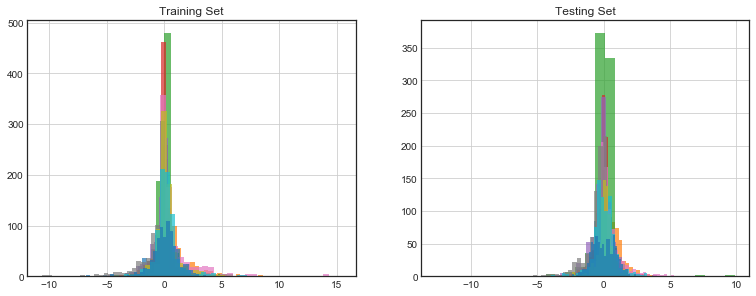

In [788]:
fig1 = plt.figure(figsize=(20,16))

ax1 = fig1.add_subplot(331)
plt.title("Training Set")
df_train['acidity_1'].hist(alpha = 0.7, bins=30)
df_train['acidity_2'].hist(alpha = 0.7, bins=30) 
df_train['acidity_3'].hist(alpha = 0.7, bins=30) 
df_train['acidity_4'].hist(alpha = 0.7, bins=30) 
df_train['acidity_5'].hist(alpha = 0.7, bins=30)
df_train['acidity_6'].hist(alpha = 0.7, bins=30)
df_train['acidity_7'].hist(alpha = 0.7, bins=30)
df_train['acidity_8'].hist(alpha = 0.7, bins=30)
df_train['acidity_9'].hist(alpha = 0.7, bins=30) 
df_train['acidity_10'].hist(alpha = 0.7, bins=30) 
df_train['acidity_11'].hist(alpha = 0.7, bins=30)

ax2 = fig1.add_subplot(332)
plt.title("Testing Set")
df_test['acidity_1'].hist(alpha = 0.7, bins=30)
df_test['acidity_2'].hist(alpha = 0.7, bins=30) 
df_test['acidity_3'].hist(alpha = 0.7, bins=30) 
df_test['acidity_4'].hist(alpha = 0.7, bins=30) 
df_test['acidity_5'].hist(alpha = 0.7, bins=30)
df_test['acidity_6'].hist(alpha = 0.7, bins=30)
df_test['acidity_7'].hist(alpha = 0.7, bins=30)
df_test['acidity_8'].hist(alpha = 0.7, bins=30)
df_test['acidity_9'].hist(alpha = 0.7, bins=30) 
df_test['acidity_10'].hist(alpha = 0.7, bins=30) 
df_test['acidity_11'].hist(alpha = 0.7, bins=30)


In [789]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.6019642916231682

Parameter estimates for the model with few features:
[ 0.         -0.          0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.518343
 -0.07315603]

R² for the model with many features:
0.5862801221542562

Parameter estimates for the model with many features:
[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  4.60865210e-01
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000

In [790]:
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr.fit(X_train, Y_train)
print(ridgeregr.score(X_train, Y_train))
origparams = ridgeregr.coef_[0]

0.7499761133129462


In [791]:
ridgeregrBig = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgeregrBig.fit(X_train2, Y_train)
print(ridgeregrBig.score(X_train2, Y_train))
newparams = ridgeregrBig.coef_[0, 0:len(origparams)]

0.9012212806947844


In [792]:
print('\nParameter Estimates for the same predictors for the small model'
      'and large model:')
compare = np.column_stack((origparams, newparams))
prettycompare = np.array2string(
    compare,
    formatter={'float_kind':'{0:.3f}'.format})
print(prettycompare)


Parameter Estimates for the same predictors for the small modeland large model:
[[0.038 0.002]
 [-0.033 0.001]
 [-0.059 0.001]
 [-0.031 0.001]
 [0.024 0.013]
 [0.041 0.057]
 [-0.095 -0.036]
 [0.023 -0.081]
 [0.046 0.036]
 [0.014 -0.011]
 [0.005 0.019]
 [0.876 0.902]]


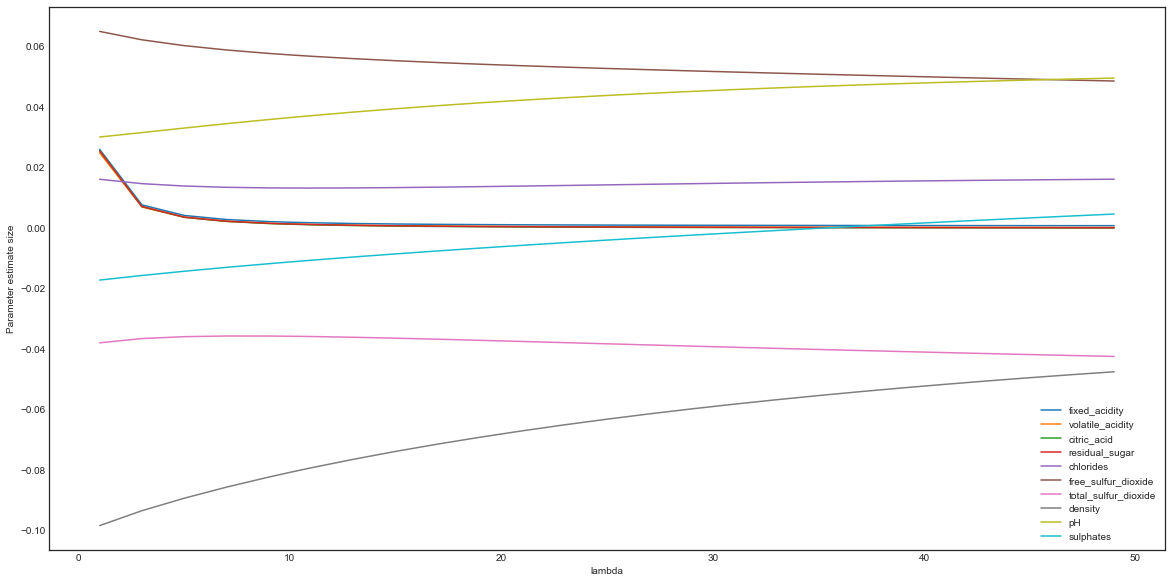

In [793]:
# Store estimates.
estimates = np.append(ridgeregrBig.coef_, [10])

# Storing legend information.
labels = []

#Run the model for many alphas.
for lambd in range(1, 50, 2):
    ridgeregrBig = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridgeregrBig.fit(X_train2, Y_train)
    estimates = np.row_stack((
        estimates,
        np.append(ridgeregrBig.coef_,[lambd])))

# Make the data pretty.
estimates_df = pd.DataFrame(
    estimates,
    columns=list(X_train2.columns) + ['lambda'])
estimates_df.sort_values(by='lambda', inplace=True, ascending=True)

# Leave out the 'student' variable.
# It has very high values and throws off our plot's scale.
varstoplot = list(estimates_df.columns[:11,])
varstoplot.remove('alcohol')
plt.figure(figsize=(20,10))
# Plot a line for each parameter.
for var in varstoplot:
    plt.plot(estimates_df['lambda'], estimates_df[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('Parameter estimate size')
plt.legend(labels)
plt.show()

C:\Users\cvo.MODIFIEDPOLYMER\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
C:\Users\cvo.MODIFIEDPOLYMER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\cvo.MODIFIEDPOLYMER\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'acidity_1', 'acidity_2',
       'acidity_3', 'acidity_4', 'acidity_5', 'acidity_6', 'acidity_7',
       'acidity_8', 'acidity_9', 'acidity_10', 'acidity_11',
       'volatile_acidity_1', 'volatile_acidity_2', 'volatile_acidity_3',
       'volatile_acidity_4', 'volatile_acidity_5', 'volatile_acidity_6',
       'volatile_acidity_7', 'volatile_acidity_8', 'volatile_acidity_9',
       'volatile_acidity_10', 'citric_acid_1', 'citric_acid_2',
       'citric_acid_3', 'citric_acid_4', 'citric_acid_5', 'citric_acid_6',
       'citric_acid_7', 'citric_acid_8', 'citric_acid_9', 'residual_sugar_1',
       'residual_sugar_2', 'residual_sugar_3', 'residual_sugar_4',
       'residual_sugar_5', 'residual_sugar_6', 'residual_sugar_7',
       'residual_sugar_8', 'chlorides_1', 'chlorides_2', 'chlorides_

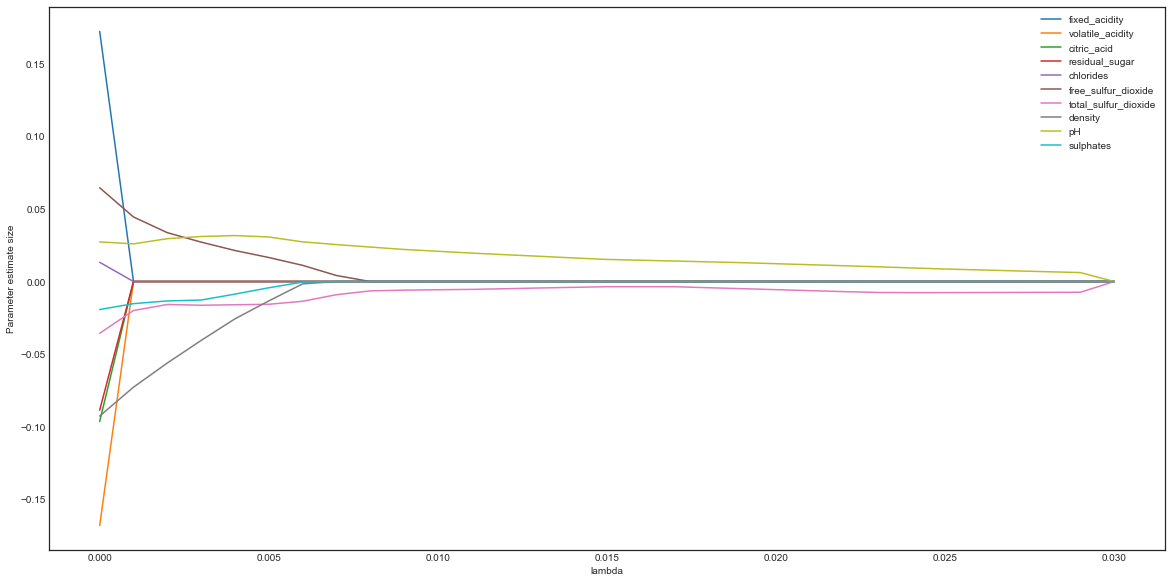

In [794]:
# Your code here
import decimal

def drange(x, y, jump):
    while x < y:
        yield float(x)
        x += decimal.Decimal(jump)

# Store estimates.
estimates = np.append(lassBig.coef_, [.03])

# Storing legend information.
labels = []

#Run the model for many alphas.
for lambd in drange(0, 0.03, '0.001'):
    lassBig = linear_model.Lasso(alpha=lambd)
    lassBig.fit(X_train2, Y_train)
    estimates = np.row_stack((
        estimates,
        np.append(lassBig.coef_,[lambd])))

# Make the data pretty.
estimates_df = pd.DataFrame(
    estimates,
    columns=list(X_train2.columns) + ['lambda'])
estimates_df.sort_values(by='lambda', inplace=True, ascending=True)

print(estimates_df.columns)
# Leave out the 'student' variable.
# It has very high values and throws off our plot's scale.
varstoplot = list(estimates_df.columns[:11,])
varstoplot.remove('alcohol')
print(varstoplot)

# Plot a line for each parameter.
plt.figure(figsize=(20,10))

for var in varstoplot:
    plt.plot(estimates_df['lambda'], estimates_df[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('Parameter estimate size')
plt.legend(labels)
plt.show()

Ridge Regression is the easier one to view, and comparing to the other 2, it also have the highest accuracy rate which is 90% (with high features). Even Ridge Regression with low features score a second best score, which is 74%. What I did with the Ridge Regression is I remove the "alcohol", "chlorides", and "quality". I remove "alcohol" because a variable that overfit the graph. "Chlorides", and "quality" reduces the accuracy rate of Logistics, therefore, I remove those as well. The second highest is Logistic Regression, which have an accuracy rate of 73%, which isn't all that great when compare to the Ridge Regression, but it sure is better than Lasso Regression. Last is Lasso, with few features, it have an accucucy of 60% and with more features, the accuracy actually dropped to 58%. Of course the Ridge (w/ high features) is the best Regression by far. It easily tell you the outliers and so we can to remove them to have a better model. 